##Time Series Forecasting -Bit Predict

In [1]:
#get data
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"

--2021-09-15 01:59:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2021-09-15 01:59:12 (6.13 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



##Importing data with pandas


In [189]:
#import with pandas
import pandas as pd

df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [191]:
#data count
len(df)

2787

#Visualize the data

In [5]:
#take clsoing price and data
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)" :"Price" })
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


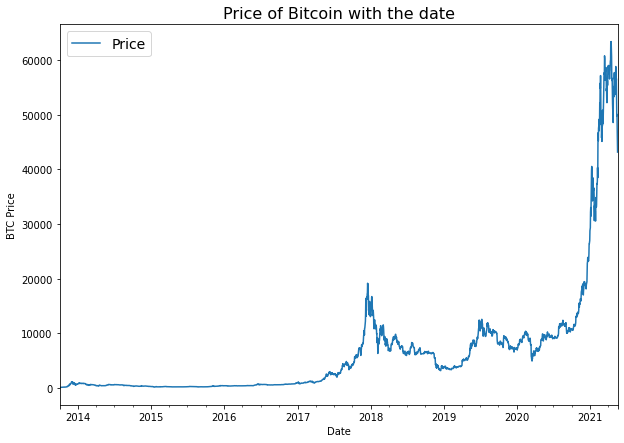

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin with the date",fontsize=16)
plt.legend(fontsize=14)

#Importing time series data with python csv module

In [7]:
#formatting data 
import csv
from datetime import datetime

timesteps =[]
btc_price =[]

with open ("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader=csv.reader(f,delimiter=",")
  
  #skip the first line (remove the header line
  next(csv_reader)

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

#view first 10
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

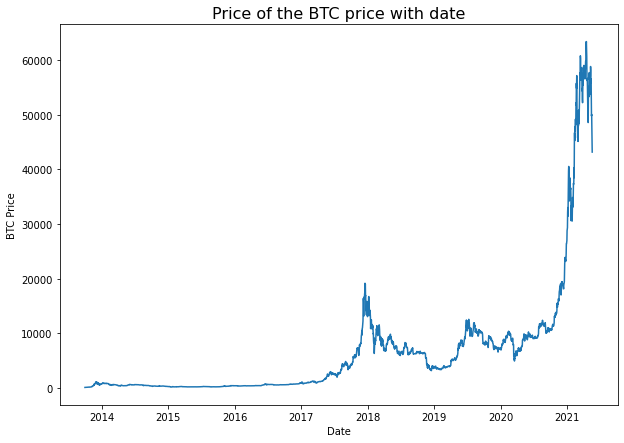

In [8]:
#plot from csv
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.title("Price of the BTC price with date",fontsize=16)
plt.xlabel("Date")



---



#Create data part :Train and Test Data


In [9]:
#get bitcoin data arrya
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()
    
timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
#wrong way
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(timesteps,
                                                prices,
                                                test_size=0.2,
                                                random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

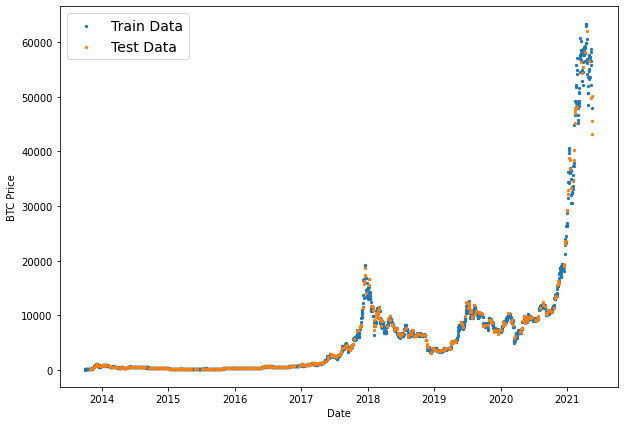

In [11]:
#plot the wrong test and train data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

#Create Train and Test data -Correct way

In [12]:
#craete train and test splits 
split_size =int(0.8 *len(prices))

#create train data splits
X_train,y_train =timesteps[:split_size],prices[:split_size]


#create test data splits
X_test,y_test =timesteps[split_size:],prices[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

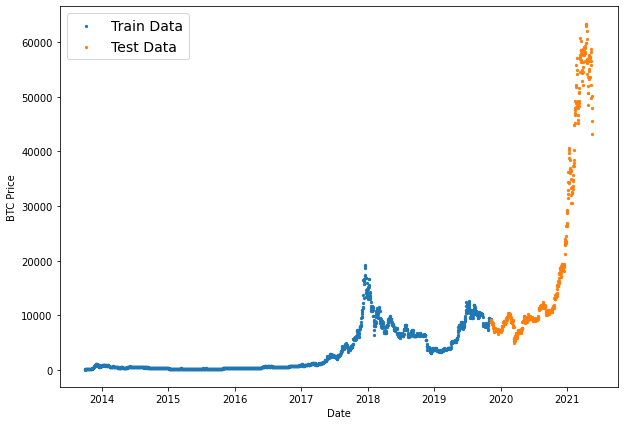

In [13]:
#plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train Data")
plt.scatter(X_test,y_test,s=5,label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

#Plot and Visualize Data

In [14]:
#create plot function to plot time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  """
  Plot the timesteps aginst the values

  parameters:
  timesteps : array of timesteps values
  values :array of values across time
  format :style of plot, default "."
  start :where start the plot
  end :where to end the plot
  label =label to show on the plot
  """
 
  #plot the series
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

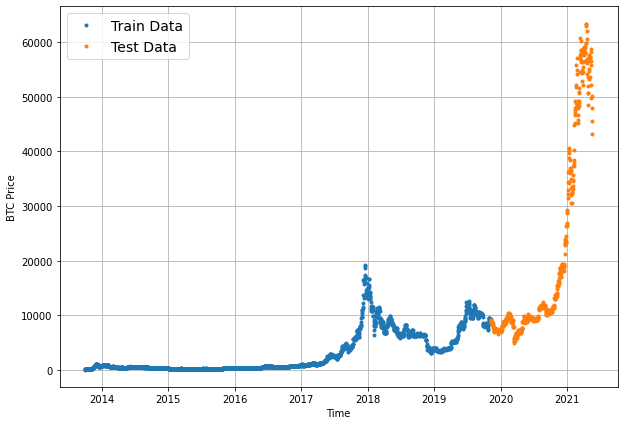

In [15]:
#test the plotting fucntion
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train Data")
plot_time_series(timesteps=X_test,values=y_test,label="Test Data")

#Model 0 -Naive Forecast Model (Base line Model)

In [16]:
#create naive forecast
naive_forecast =y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

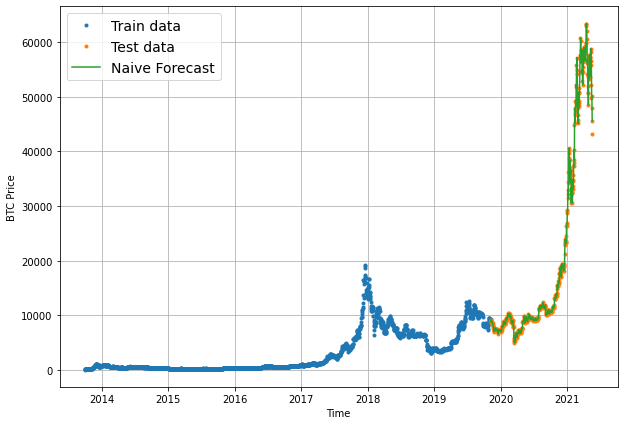

In [17]:
#plot the naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format="-",label="Naive Forecast")

#Evalauting the time series model

In [18]:
import tensorflow as tf


In [19]:
#mase implementation
def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implement MASE(asssuming no saeonability of data)


  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  #find the mae of naive forecast
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_true=y_test[1:] ,y_pred=naive_forecast).numpy()

0.9995699939182624

In [21]:
#craete a function to take model predctions and truth values and return evaluation metrics
def evaluate_preds(y_true,y_pred):
  
  #make sure float32 datatype
  y_true =tf.cast(y_true,dtype=tf.float32)
  y_pred =tf.cast(y_pred,dtype=tf.float32)

  #calculate various evalution metrics
  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse =tf.sqrt(mse)
  mape =tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}


In [22]:
naive_results =evaluate_preds(y_true=y_test[1:],
                              y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [23]:
tf.reduce_mean(y_test),tf.reduce_min(y_test),tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

#Format the data :windowing the data

In [24]:
btc_price[:7],btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [25]:
#set up global varibale
HORIZON=1#predict next day
WINDOW_SIZE=7 #use past 7 days to predict

In [26]:
#create fucntion to label windowed data
def get_labelled_windows(x,horizon=HORIZON):
  """
  carets labels for windowed dataset

  eg:
  horizon =1
  INPUT :[0,1,2,3,4,5,6,7] -->output ([0,1,2,3,4,5,6,7],[8])
  """

  return x[:,:-horizon],x[:,-horizon]



In [27]:
#test out the window labelling function
test_window,test_label =get_labelled_windows(tf.expand_dims(tf.range(8),axis=0))
print(f"Window :{tf.squeeze(test_window).numpy()} -->Label: {tf.squeeze(test_label).numpy()}")

Window :[0 1 2 3 4 5 6] -->Label: 7


In [28]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [29]:
#create function to view numpy array as window
def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):
  """
  Turns 1d array into sequrntional labbeled window of window_size with horizon labels
  """
  #create a window of specific window_size(add the horizon on the end for labelling later)
  window_step =np.expand_dims(np.arange(window_size+horizon),axis=0)

  #create a 2d array pf mutiple window steps(minus 1 to account for 0 indexing)
  window_indexes =window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T

  print(f"Window indexes :\n {window_indexes,window_indexes.shape}")

  #index on target array with 2d array of multiple window steps
  windowed_array =x[window_indexes]
  print(windowed_array)

  #get the labeeled window
  windows,labels =get_labelled_windows(windowed_array,horizon=horizon)
  return windows,labels

In [30]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes :
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [31]:
#view data
for i in range(3):
  print(f"Window :{full_windows[i]} --> Label {full_labels[i]}")

Window :[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> Label 123.03299999999999
Window :[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> Label 124.04899999999999
Window :[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> Label 125.96116


In [32]:
#view windows
for i in range(3):
  print(f"Window :{full_windows[i-3]} --> Label :{full_labels[i-3]}")

Window :[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] --> Label :47885.6252547166
Window :[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] --> Label :45604.61575361309
Window :[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] --> Label :43144.471290860296


In [33]:
tf.keras.utils.timeseries_dataset_from_array(
    prices, test_label, sequence_length=7, sequence_stride=1, sampling_rate=1,
    batch_size=128, shuffle=False, seed=None, start_index=None, end_index=None
)

<BatchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.int32)>

#Turning windows into train and test dataset

In [34]:
#make the train/test splits
def make_train_test_splits(windows,labels,test_split=0.2):
  """
  splits matching pairs into train and test_splits
  """

  split_size=int(len(windows)*(1-test_split))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows,test_windows,train_labels,test_labels

In [35]:
#craete train and test windows
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [36]:
train_windows[:5],train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [37]:
#check to see labels are same
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

#Make Modelling checkpoint Callback

---



In [38]:
import os

#create a function to implement model checkpoint to every epoch
def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True)

#Model 1 :Dense Model (window=7,horizon=1)

*single dense layer with 128 hidden units and Relu

*output layer with linear activation 

*adam optimization and mae loss function

*batch size of 128

*100 epochs

In [39]:
import tensorflow as tf
from tensorflow.keras import layers

#set a random seed for as reprodicibale results as possible
tf.random.set_seed(42)

#construct the model
model_1 =tf.keras.Sequential([
                              layers.Dense(128,activation="relu"),
                              layers.Dense(HORIZON,activation="linear")
],name="model_1_dense")

#compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

#fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
18/18 [==============================] - 3s 14ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
INFO:tensorflow:Assets written to: model_ex

In [40]:
#evaluate model on test data
model_1_results=model_1.evaluate(test_windows,test_labels)
model_1_results

18/18 [==============================] - 0s 4ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [41]:
#load the save best performing model and evaluate
model_1 =tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1_results=model_1.evaluate(test_windows,test_labels)
model_1_results

18/18 [==============================] - 0s 3ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

#Making forecast with the model on test data

1.take train model

2.takes in input data

3.passes the data into the model

4.return the predictions


In [42]:
def make_preds(model,input_data):
  """
  Uses model to make predctions input_data
  """ 
  forecast =model.predict(input_data)
  return tf.squeeze(forecast)

In [43]:
#make predictions
model_1_preds =make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
        8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>)

In [44]:
test_labels.shape,model_1_preds.shape



((556,), TensorShape([556]))

In [45]:
#evaluate the preds_
model_1_results=evaluate_preds(y_true=test_labels,
                               y_pred=model_1_preds)

model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4712}

In [46]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

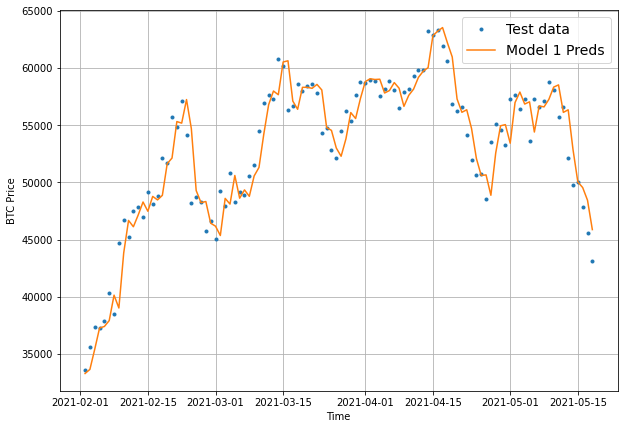

In [47]:
#plot the model
offset =450
plt.figure(figsize=(10,7))

#create for plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels,
                 start=offset,
                 label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="Model 1 Preds")



#Model 2 -Dense Model (window =30 horizon =1)

In [48]:
HORIZON=1
WINDOW_SIZE=30

In [49]:
#make window data
full_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [50]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes :
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))
[[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.10158771 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2757, 2757)

In [51]:
#make train and test windows
train_windows,test_windows,train_labels,test_labels =make_train_test_splits(windows=full_windows,
                                                                            labels=full_labels,
                                                                            test_split=0.2)

In [52]:
train_windows[:3]


array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [53]:
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2205, 2205, 552, 552)

In [54]:
tf.random.set_seed(42)

#craete model
model_2 =tf.keras.Sequential([
                              layers.Dense(128,activation="relu"),
                              layers.Dense(HORIZON)
],name="model_2_dense")


#compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])


#fit the model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [55]:
#evaluate the model
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [56]:
#load the best parameters
model_2=tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [57]:
#get the predictions
model_2_preds =make_preds(model_2,
                          input_data=test_windows)

In [58]:
#evaluate results
model_2_results=evaluate_preds(y_true=test_labels,
                               y_pred=model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693386,
 'mase': 1.0644706,
 'mse': 1281438.8,
 'rmse': 1132.0065}

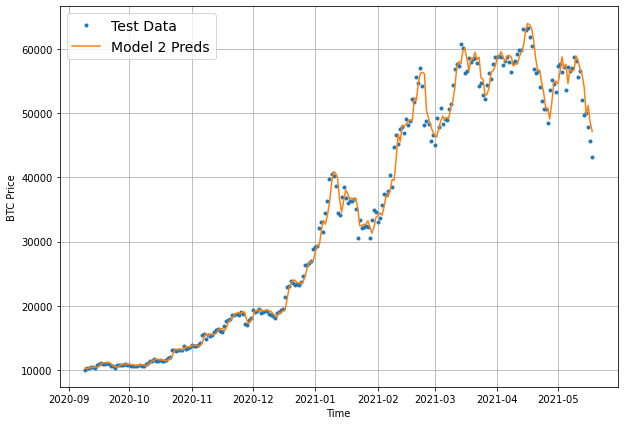

In [59]:
offset=300
plt.figure(figsize=(10,7))

#account the test windows size
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels,start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,start=offset,format="-",label="Model 2 Preds")

#Model 3 -Dense Model (window =30 horizon =7)

In [60]:
HORIZON=7
WINDOW_SIZE=30

In [61]:
#make window data
full_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [62]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes :
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))
[[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.19724227 63223.88439079 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2751, 2751)

In [63]:
#make train and test windows
train_windows,test_windows,train_labels,test_labels =make_train_test_splits(windows=full_windows,
                                                                            labels=full_labels,
                                                                            test_split=0.2)

In [64]:
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2200, 2200, 551, 551)

In [65]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [66]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 614.8192


614.8192138671875

In [67]:
#load the best parameters
model_3=tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 599.4505


599.4505004882812

In [68]:
#get the predictions
model_3_preds =make_preds(model_3,
                          input_data=test_windows)

In [69]:
model_3_preds[:5],model_3_preds.shape

(<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
 array([[9204.087, 9307.428, 9346.239, 9322.108, 9257.569, 9408.65 ,
         9321.06 ],
        [8878.963, 8993.068, 9073.988, 8917.815, 8803.415, 8948.541,
         8976.297],
        [8878.328, 8860.245, 8951.54 , 8820.758, 8678.005, 8791.144,
         8837.626],
        [9049.313, 8896.042, 8904.545, 8942.667, 8702.5  , 8909.269,
         8862.655],
        [8939.769, 8811.958, 8700.014, 8811.644, 8785.342, 8908.778,
         8771.228]], dtype=float32)>, TensorShape([551, 7]))

#Make Evaluation Function to larger horizons

In [70]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [71]:
model_3_preds

<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9204.087,  9307.428,  9346.239, ...,  9257.569,  9408.65 ,
         9321.06 ],
       [ 8878.963,  8993.068,  9073.988, ...,  8803.415,  8948.541,
         8976.297],
       [ 8878.328,  8860.245,  8951.54 , ...,  8678.005,  8791.144,
         8837.626],
       ...,
       [58022.695, 58599.32 , 58288.598, ..., 57827.688, 58837.508,
        58451.793],
       [57997.766, 58582.61 , 58645.945, ..., 57853.39 , 58861.723,
        58168.816],
       [56972.453, 57467.188, 56865.645, ..., 56488.65 , 56211.066,
        57261.836]], dtype=float32)>

In [72]:
#evaluate results
model_3_results=evaluate_preds(y_true=test_labels,
                               y_pred=tf.reduce_mean(model_3_preds))
model_3_results

{'mae': 14180.907,
 'mape': 96.06718,
 'mase': 25.829008,
 'mse': 301476260.0,
 'rmse': 17363.072}

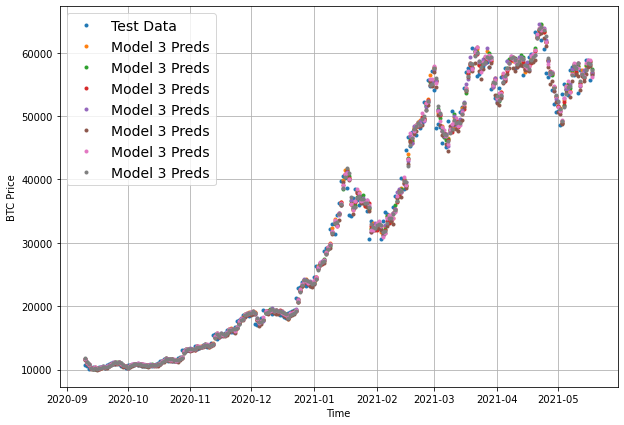

In [73]:
offset=300
plt.figure(figsize=(10,7))

#account the test windows size
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels,start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,label="Model 3 Preds")

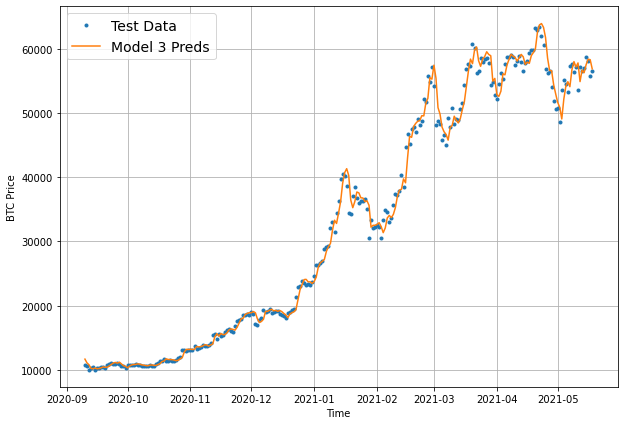

In [74]:
offset=300
plt.figure(figsize=(10,7))

#account the test windows size
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels,start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds,axis=1),
                 start=offset,
                 format="-",
                 label="Model 3 Preds")

#Check the model performance 

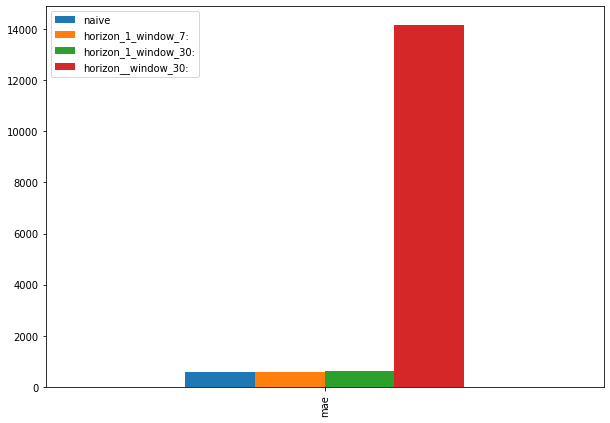

In [75]:
pd.DataFrame({"naive":naive_results["mae"],
              "horizon_1_window_7:":model_1_results["mae"],
              "horizon_1_window_30:":model_2_results["mae"],
              "horizon__window_30:":model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar")
            

#Model 4 -CONV1D model

In [76]:
HORIZON=1
WINDOW_SIZE=7

In [77]:
#create windowed data
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes :
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [78]:
#craete train/test data
train_windows,test_windows,train_labels,test_labels =make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_labels),len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [79]:
test_windows[0]

array([9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
       9335.75240233, 9226.48582088, 8794.35864452])

In [80]:
test_windows[0].shape

(7,)

#Reshape the data

In [81]:
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [82]:
expand_dims_layer =layers.Lambda(lambda x:tf.expand_dims(x,axis=1))

In [83]:
#test our out lambda layer
print(f"Original shape :{x.shape}")
print(f"Expand shape :{expand_dims_layer(x).shape}")
print(f"Original Value with expand shape :\n{expand_dims_layer(x)}")



Original shape :(7,)
Expand shape :(7, 1)
Original Value with expand shape :
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [84]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])



INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [85]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [86]:
#evaluate the model
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 610.1541


610.1541137695312

In [87]:
#load the best parameters
model_4=tf.keras.models.load_model("/content/model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.8284


570.828369140625

In [88]:
#make predcitons
model_4_preds=make_preds(model_4,test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.465, 8754.47 , 8983.927, 8759.67 , 8703.627, 8708.293,
       8661.667, 8494.839, 8435.317, 8492.114], dtype=float32)>

In [89]:
#evaluate the predcitons
model_4_results =evaluate_preds(y_true=test_labels,
                                y_pred=model_4_preds)

model_4_results

{'mae': 570.8284,
 'mape': 2.5593357,
 'mase': 1.0027875,
 'mse': 1176671.4,
 'rmse': 1084.7449}

#Model 5 :RNN-LSTM Layer Model


In [90]:
HORIZON=1
WINDOW_SIZE=7

In [91]:
#create windowed data
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes :
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [92]:
#craete train/test data
train_windows,test_windows,train_labels,test_labels =make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_labels),len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [93]:
test_windows[0].shape

(7,)

In [94]:
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [95]:
expand_dims_layer =layers.Lambda(lambda x:tf.expand_dims(x,axis=1))

In [96]:
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.LSTM(units=128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_5_LSTM")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_5.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 2s 23ms/step - loss: 2323.6082 - val_loss: 9222.6523
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
18/18 [==============================] - 0s 11ms/step - loss: 695.4739 - val_loss: 1486.0555
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 237.3967 - val_loss: 1298.9084
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 181.9180 - val_loss: 966.6430
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 173.5414 - val_loss: 941.4746
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 7/10

In [97]:
model_5.summary()

Model: "model_5_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               69632     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [98]:
#evaluate the model
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 597.1186


597.1185913085938

In [99]:
#load the best parameters
model_5=tf.keras.models.load_model("/content/model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 596.6447


596.6446533203125

In [100]:
#make predcitons
model_5_preds=make_preds(model_5,test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8991.225, 8823.2  , 9009.359, 8847.859, 8742.254, 8788.655,
       8744.746, 8552.568, 8514.823, 8542.873], dtype=float32)>

In [101]:
#evaluate the predcitons
model_5_results =evaluate_preds(y_true=test_labels,
                                y_pred=model_5_preds)

model_5_results

{'mae': 596.64465,
 'mape': 2.6838453,
 'mase': 1.0481395,
 'mse': 1273486.9,
 'rmse': 1128.4888}

In [102]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

#Built multivariate dataset



In [103]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [104]:
#add halving events
block_reward_1 =50
block_reward_2 =25
block_reward_3 =12.5
block_reward_4 =6.25
block_reward_5 =3.125

#block reward date
block_reward_2_datetime =np.datetime64("2012-11-28")
block_reward_3_datetime =np.datetime64("2016-07-09")
block_reward_4_datetime =np.datetime64("2020-05-18")


In [105]:
#create data rangers for the values
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [106]:
#add block reward column
bitcoin_prices_block =bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None



In [107]:
#add block reawrd values to the feature
bitcoin_prices_block.iloc[:block_reward_2_days,-1] =block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] =block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] =block_reward_4

In [108]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [109]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


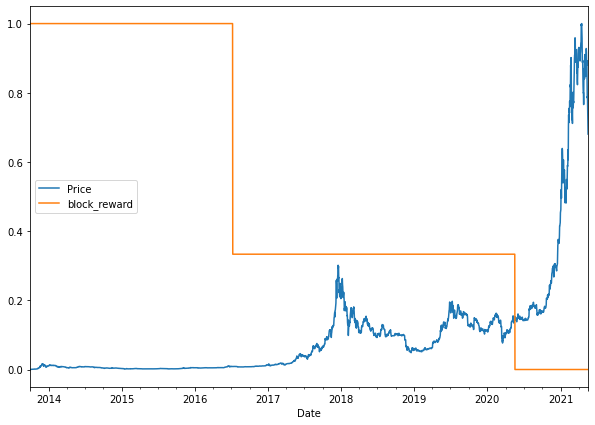

In [110]:
#plot the block reward with time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                                                     columns=bitcoin_prices_block.columns,
                                                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

#Make windowed dataset with pandas

In [111]:
#setup dataset parameters
HORIZON=1
WINDOW_SIZE=7

In [112]:
#make copy of the dataset
bitcoin_prices_windowed =bitcoin_prices_block.copy()
bitcoin_prices_windowed

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


In [113]:
#add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price {i+1}"] =bitcoin_prices_windowed["Price"].shift(periods =i+1)

bitcoin_prices_windowed.head()

,Price,block_reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [114]:
#create X windows and y horizon features
X =bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y =bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [115]:
y.head()


Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [116]:
#make train and test dataset
split_size=int(len(X)*0.8)
X_train,y_train =X[:split_size],y[:split_size]
X_test,y_test =X[split_size:],y[split_size:]
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

#Model 6 -Dense (Multivariate Time Series)

In [117]:
import tensorflow as tf
from tensorflow.keras import layers

#set a random seed for as reprodicibale results as possible
tf.random.set_seed(42)

#construct the model
model_6 =tf.keras.Sequential([
                              layers.Dense(128,activation="relu"),
                              layers.Dense(64,activation="relu"),
                              layers.Dense(HORIZON,activation="linear")
],name="model_6_dense")

#compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

#fit the model
model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 2079.9956 - mae: 2079.9956 - mse: 13861946.0000 - val_loss: 1938.4285 - val_mae: 1938.4285 - val_mse: 10203312.0000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 413.2998 - mae: 413.2998 - mse: 653961.3125 - val_loss: 1856.3627 - val_mae: 1856.3627 - val_mse: 8139813.0000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 222.7559 - mae: 222.7559 - mse: 237900.5938 - val_loss: 1327.1108 - val_mae: 1327.1108 - val_mse: 4725947.5000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 192.0770 - mae: 192.0770 - mse: 192315.0625 - val_loss: 1037.4915 - val_mae: 1037.4915 - val_mse: 3487516.5000
INFO:tensorflow:Assets written to: m

In [118]:
#evaluate model on test data
model_6_results=model_6.evaluate(X_test,y_test)
model_6_results

18/18 [==============================] - 0s 2ms/step - loss: 569.0424 - mae: 569.0424 - mse: 1161161.0000


[569.0423583984375, 569.0423583984375, 1161161.0]

In [119]:
#load the save best performing model and evaluate
model_6 =tf.keras.models.load_model("/content/model_experiments/model_6_dense")
model_6_results=model_6.evaluate(X_test,y_test)
model_6_results

18/18 [==============================] - 0s 2ms/step - loss: 564.5520 - mae: 564.5520 - mse: 1158976.3750


[564.552001953125, 564.552001953125, 1158976.375]

In [120]:
#make predictions
model_6_preds =make_preds(model_6,X_test)
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8843.244, 8775.287, 9034.422, 8755.49 , 8744.502, 8750.394,
       8671.322, 8520.411, 8459.679, 8528.584], dtype=float32)>

In [121]:
model_6_preds[0]



<tf.Tensor: shape=(), dtype=float32, numpy=8843.244>

In [122]:
#evaluate the predcitons
model_6_results =evaluate_preds(y_true=y_test,
                                y_pred=model_6_preds)

model_6_results

{'mae': 564.55206,
 'mape': 2.538174,
 'mase': 0.9917616,
 'mse': 1158976.4,
 'rmse': 1076.5576}

In [123]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

#Model 7 -N-BEATS Algorithem

In [124]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

     

In [125]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [126]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [127]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.4634872   0.10944451 -0.4335534   0.93602407 -0.35703534 -0.17927621
 -0.34048355]
Forecast: -0.4397900700569153


#Preparing data for NBeats algorithem using tf.data API

In [128]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [129]:
#Create n-beats data inputs
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [130]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [131]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [132]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

#Setup hyper parameters to N-Beats Algorithem

In [133]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

#The Residual Connections

In [134]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


#Creating the N-Beats Algorithem

In [135]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
residuals, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 00150: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00250: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 54.9 s, sys: 3.08 s, total: 58 s
Wall time: 2min 11s


In [136]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 43ms/step - loss: 572.0523 - mae: 572.0523 - mse: 1168698.8750


[572.0523071289062, 572.0523071289062, 1168698.875]

In [137]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8817.283, 8794.405, 9093.193, 8737.813, 8785.531, 8772.97 ,
       8682.386, 8498.446, 8495.936, 8550.903], dtype=float32)>

In [138]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 572.0523,
 'mape': 2.5669715,
 'mase': 1.0049374,
 'mse': 1168698.9,
 'rmse': 1081.0637}

In [139]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4712}

In [140]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

#PLot the N-Beats architecture

In [141]:
# #plot hybrid token and character model
# from keras.utils.vis_utils import plot_model
# plot_model(model_7,show_shapes=True)

In [142]:
# # Plot the N-BEATS model and inspect the architecture
# from tensorflow.keras.utils import plot_model
# plot_model(model_7)

#Model-8 :Creating a Ensemble Model

In [143]:
HORIZON,WINDOW_SIZE

(1, 7)

#Constructing MOdels

In [144]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [145]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00591: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00707: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00807: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 00886: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 00409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 0

#Make Predctions with ensemble model

In [146]:
#create a fucntion which used a list of trained models to make and return a list of predctions
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds=[]
  
  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)

  return tf.constant(tf.squeeze(ensemble_preds))

In [147]:
#craete a list of ensemble preds

%%time
ensemble_preds=make_ensemble_preds(ensemble_models=ensemble_models,
                                   data=test_dataset)

ensemble_preds

CPU times: user 627 ms, sys: 36.1 ms, total: 663 ms
Wall time: 636 ms


In [148]:
y_test

Date
2019-11-10     8798.042055
2019-11-11     9081.186878
2019-11-12     8711.534339
2019-11-13     8760.892718
2019-11-14     8749.520591
                  ...     
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Price, Length: 556, dtype: float64

In [149]:
#evalaute ensemble model results
ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_preds)

ensemble_results

{'mae': 579.84406,
 'mape': 2.6541357,
 'mase': 1.0186254,
 'mse': 1182231.8,
 'rmse': 1087.1208}

In [150]:
ensemble_mean=tf.reduce_mean(ensemble_preds,axis=0)
ensemble_mean[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8796.566, 8780.421, 9069.809, 8730.931, 8748.66 ], dtype=float32)>

In [151]:
ensemble_median=np.median(ensemble_preds,axis=0)
ensemble_median[:5]

array([8792.849, 8771.183, 9076.292, 8718.613, 8751.856], dtype=float32)

In [152]:
ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_mean)
ensemble_results

{'mae': 566.94916,
 'mape': 2.5806384,
 'mase': 0.99597263,
 'mse': 1144479.0,
 'rmse': 1069.8032}

In [153]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4712}

In [154]:
ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_median)
ensemble_results

{'mae': 566.51416,
 'mape': 2.5772514,
 'mase': 0.99520844,
 'mse': 1143775.5,
 'rmse': 1069.4744}

#Plotting the prediction intervals

In [155]:
#find the upper and lower bounds

def get_upper_lower(preds):
  #take a prediction from randomly initilzed model


  #measure the statndred deviation of the predictions
  std=tf.math.reduce_std(preds,axis=0)

  #multiply the standered deviation from 1.96
  interval =1.96 *std

  #get the prediction interval upper and lower bounds
  preds_mean=tf.reduce_mean(preds,axis=0)
  lower,upper =preds_mean -interval,preds_mean + interval

  return lower ,upper

  

In [156]:
#get the upper and lower bounds of prediction interval

lower,upper =get_upper_lower(preds=ensemble_preds)
lower[:5],upper[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8672.331, 8724.999, 9015.055, 8617.061, 8685.281], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([8920.802 , 8835.843 , 9124.5625, 8844.801 , 8812.039 ],
       dtype=float32)>)

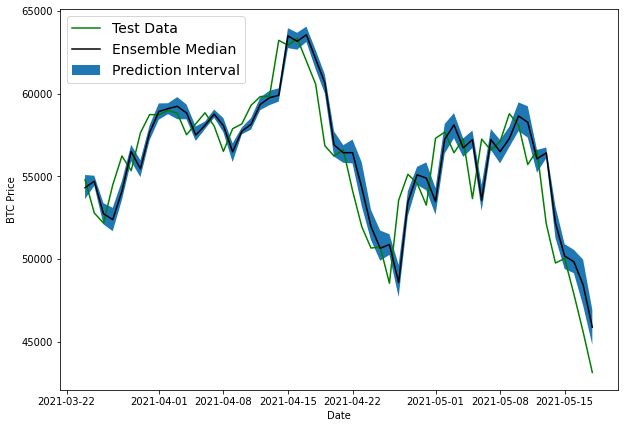

In [157]:
#get the median/mean values of the ensembel preds
ensemble_median =np.median(ensemble_preds,axis=0)

#plot the median of ensemble preds with predciton intervals
offset =500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"g",label="Test Data")
plt.plot(X_test.index[offset:],ensemble_median[offset:],"k-",label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label="Prediction Interval")
plt.legend(loc="upper left" ,fontsize=14)

In [158]:
print("Bitcoin price plotting")

Bitcoin price plotting


#Model 9 :Train a Model on the full historical data to make predcitions into the future

In [159]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [160]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [161]:
#train model on entire data to make predctions
X_all =bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()

#get labels
y_all=bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all),len(y_all)

(2780, 2780)

In [162]:
X_all[:5]

array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
        123.65499],
       [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
        125.455  ],
       [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
        108.58483],
       [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
        118.67466],
       [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
        121.33866]])

In [163]:
#turn data into tf dataset
features_dataset_all =tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all =tf.data.Dataset.from_tensor_slices(y_all)


#combine all features and labels
dataset_all =tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))

#batch and prefetch for optimal performance
BATCH_SIZE=1024
dataset_all=dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [164]:
tf.random.set_seed(42)

#create a model
model_9 =tf.keras.Sequential([
                              layers.Dense(128,activation="relu"),
                              layers.Dense(128,activation="relu"),
                              layers.Dense(HORIZON)
],name="model_9_future_model")

#Compile the model
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

#fit the modle
model_9.fit(dataset_all,
            epochs=100,
            verbose=1,
          )

Epoch 1/100
3/3 [==============================] - 0s 6ms/step - loss: 4310.6460
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 2286.0432
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 455.6416
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 1394.4469
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 1358.7925
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 600.7654
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 584.5320
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 817.2908
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 534.2358
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 394.9995
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 524.4481
Epoch 12/100
3/3 [==============================] - 0s 6ms/step - loss: 370.9251
Epoch 13/100
3/3 [===============

#Make Predcitions into future

In [171]:
#predcitons count
INTO_FUTURE=14

In [174]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

     

In [176]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.46484375

Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] -> Prediction: 50985.9453125

Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] -> Prediction: 48522.96484375

Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96484375] -> Prediction: 48137.203125

Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96484375 48137.203125  ] -> Prediction: 47880.63671875

Predicting on: 
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96484375 48137.203125   47880.63671875] -> Prediction: 46879.71875

Predicting on: 
 [43144.47129086 55764.46484375 50985.9453125  48522.96

#Plot future forecast

In [178]:
len(future_forecast)

14

In [182]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date


In [183]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [184]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [187]:
#insert last timestep into next time steps

next_time_steps =np.insert(next_time_steps,0,last_timestep)
future_forecast =np.insert(future_forecast,0,btc_price[-1])
next_time_steps,future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.465, 50985.945, 48522.965, 48137.203, 47880.637,
        46879.72 , 48227.6  , 53963.69 , 49685.56 , 47596.176, 48114.43 ,
        48808.008, 48623.855, 50178.723], dtype=float32))

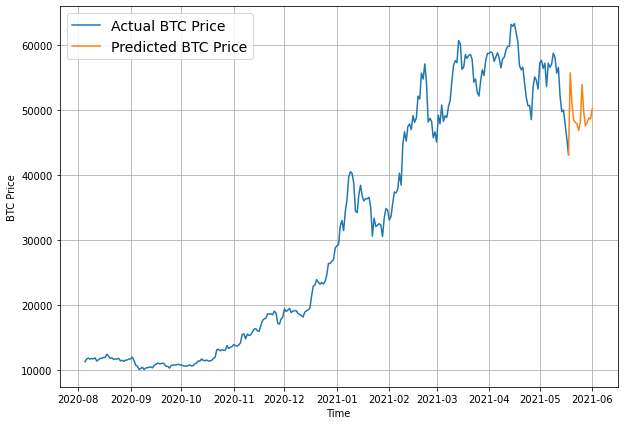

In [188]:
#plot future predictions
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,
                 btc_price,
                 start=2500,
                 format="-",
                 label="Actual BTC Price")

plot_time_series(next_time_steps,
                 future_forecast,
                 format="-",
                 label="Predicted BTC Price")

#Model 10 -Turkey Probelm

In [194]:
#create data
btc_price_turkey =btc_price.copy()
btc_price_turkey[:5]
btc_price_turkey[-1] =btc_price_turkey[-1]/100

In [195]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [197]:
#get the time steps
btc_timesteps_turkey=np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

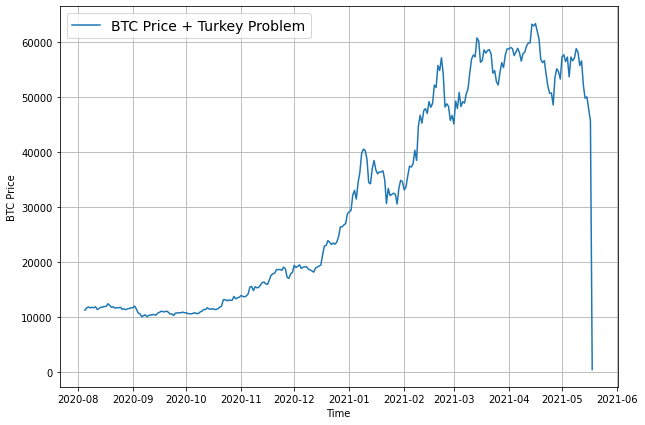

In [199]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [200]:
HORIZON=1
WINDOW_SIZE=7

In [202]:
#creta train and test data
full_windows,full_labels =make_windows(np.array(btc_price_turkey),window_size=WINDOW_SIZE,horizon=HORIZON)

X_train,X_test,y_train,y_test =make_train_test_splits(full_windows,full_labels)
len(X_train),len(X_test),len(y_train),len(y_test)

Window indexes :
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361   431.44471291]]


(2224, 556, 2224, 556)

In [203]:
import tensorflow as tf
from tensorflow.keras import layers

#set a random seed for as reprodicibale results as possible
tf.random.set_seed(42)

#construct the model
model_10 =tf.keras.Sequential([
                              layers.Dense(128,activation="relu"),
                              layers.Dense(HORIZON,activation="linear")
],name="model_10_dense")

#compile the model
model_10.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

#fit the model
model_10.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_10.name)])

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2356.4749 - val_mae: 2356.4749 - val_mse: 18228066.0000
INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1082.8212 - val_mae: 1082.8212 - val_mse: 8067127.5000
INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 1000.1083 - val_mae: 1000.1083 - val_mse: 7303184.5000
INFO:tensorflow:Assets written to: model_experiments/model_10_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 977.4092 - val_mae: 977.4092 - val_mse: 7024114.0000
INFO:tensorflow:Assets written to: mod

In [204]:
#evaluate model on test data
model_10_results=model_10.evaluate(X_test,y_test)
model_10_results

18/18 [==============================] - 0s 2ms/step - loss: 662.7982 - mae: 662.7982 - mse: 4870422.0000


[662.7982177734375, 662.7982177734375, 4870422.0]

In [206]:
#make predcitons
model_10_preds =make_preds(model_10,X_test)
model_10_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
       8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>

In [208]:
#evaluete metrics
turkey_results =evaluate_preds(y_true=y_test,
                               y_pred=model_10_preds)

turkey_results

{'mae': 645.77313,
 'mape': 21.476667,
 'mase': 0.999336,
 'mse': 4872247.5,
 'rmse': 2207.317}

In [205]:
#load the save best performing model and evaluate
model_10 =tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_10_results=model_10.evaluate(X_test,y_test)
model_10_results

18/18 [==============================] - 0s 2ms/step - loss: 645.7731 - mae: 645.7731 - mse: 4872246.5000


[645.7731323242188, 645.7731323242188, 4872246.5]

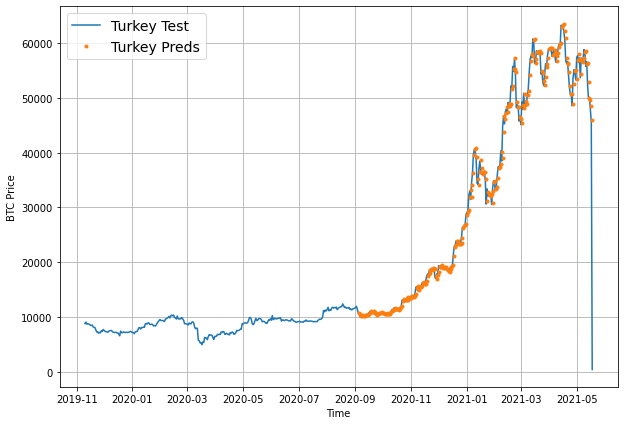

In [210]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test")

plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=model_10_preds,
                 label="Turkey Preds",
                 start=offset)

#Compare the Models

In [212]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951233,1.171744e+06,1082.471191,2.544898,0.999490
model_2_dense_w30_h1,608.961487,1.281439e+06,1132.006470,2.769339,1.064471
model_3_dense_w30_h7,14180.907227,3.014763e+08,17363.072266,96.067177,25.829008
model_4_CONV1D,570.828430,1.176671e+06,1084.744873,2.559336,1.002787
model_5_LSTM,596.644653,1.273487e+06,1128.488770,2.683845,1.048139
model_6_multivariate,564.552063,1.158976e+06,1076.557617,2.538174,0.991762
model_8_NBEATs,572.052307,1.168699e+06,1081.063721,2.566972,1.004937
model_9_ensemble,566.514160,1.143776e+06,1069.474365,2.577251,0.995208
model_10_turkey,645.773132,4.872248e+06,2207.316895,21.476667,0.999336


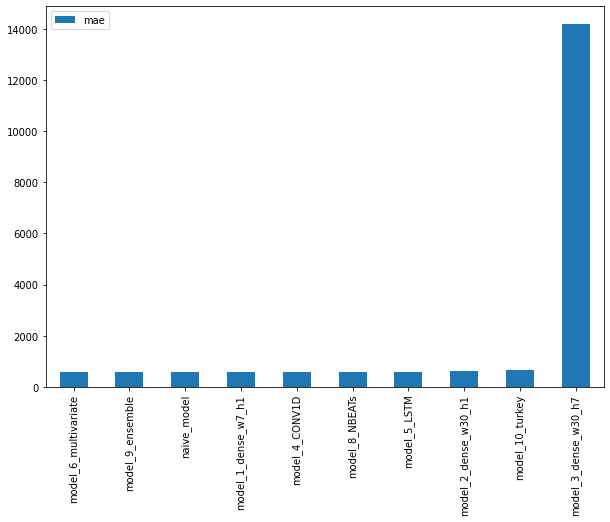

In [213]:
#sort them with mae and plot
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7),kind="bar")